In [115]:
import os
import re
import matplotlib.pyplot as plt
import albumentations as A

## Load Images


In [57]:
image_path = "./data/images"

image_names = []
mask_names = []

names = os.listdir(image_path)

In [58]:
for i in range(len(names)):

    name_split = names[i].split(".")

    # sample image name: night ride (8).png
    if (name_split[1]) == "png" and len(name_split) == 2:
        image_names.append(names[i])

    # sample mask name: night ride (8).png___fuse.png
    elif name_split[1][-4:] == "fuse":
        mask_names.append(names[i])

In [60]:
# pattern to find number from filenames
pattern = r"\d+"

# sort filenames based on number
image_names.sort(key=lambda x: int(re.findall(pattern, x)[0]))
mask_names.sort(key=lambda x: int(re.findall(pattern, x)[0]))

In [95]:
images = []
masks = []

for i in range(len(image_names)):

    img = plt.imread(image_path + "/" + image_names[i])
    img_rgb = img[:, :, :3]  # remove alpha channel from the image
    images.append(img_rgb)

    mask = plt.imread(image_path + "/" + mask_names[i])
    mask_rgb = mask[:, :, :3]  # remove alpha channel from the mask
    masks.append(mask_rgb)

## Data Exploration


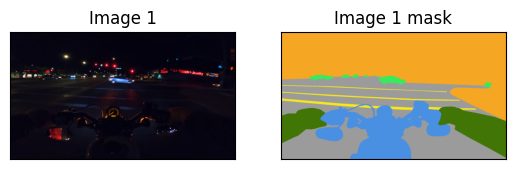

In [98]:
fig, axes = plt.subplots(1, 2)

axes[0].imshow(images[0])
axes[0].title.set_text("Image 1")

axes[1].imshow(masks[0])
axes[1].title.set_text("Image 1 mask")

for ax in axes:
    ax.set_xticks([])
    ax.set_yticks([])

## Split to Train/Test/Val sets


In [112]:
train_images = images[:146]
test_images = images[146:172]
val_images = images[172:]

In [113]:
train_masks = masks[:146]
test_masks = masks[146:172]
val_masks = masks[172:]

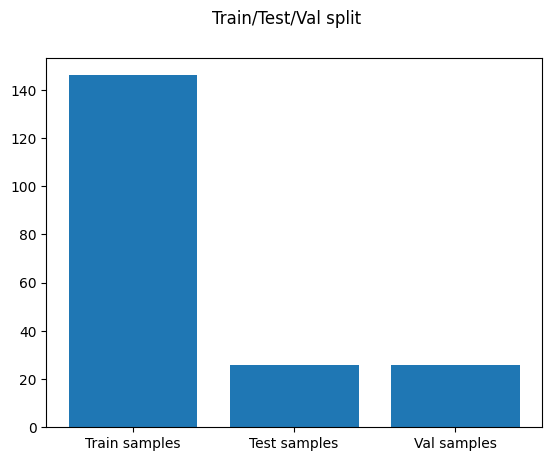

In [114]:
train_samples = len(train_images)
test_samples = len(test_images)
val_samples = len(val_images)

plt.bar(
    ["Train samples", "Test samples", "Val samples"],
    [train_samples, test_samples, val_samples],
)
plt.suptitle("Train/Test/Val split")
plt.show()

## Data Augmentation


In [117]:
# make augmentation pipeline using albumentations
transform = A.Compose(
    [
        A.RandomCrop(width=1920, height=1080),
        A.HorizontalFlip(p=0.5),
        A.RandomBrightnessContrast(p=0.4),
        A.Rotate(limit=90, p=0.5),
        A.GridDistortion(p=0.5),
    ]
)

augmented_images = []
augmented_masks = []

for image, mask in zip(train_images, train_masks):
    for _ in range(3):
        augmented = transform(image=image, mask=mask)
        augmented_images.append(augmented["image"])
        augmented_masks.append(augmented["mask"])

: 

: 

: 

In [ ]:
for i in range(5):
    fig, axes = plt.subplots(1, 2)

    axes[0].imshow(augmented_images[i])
    axes[0].title.set_text("Image", str(i + 1))

    axes[1].imshow(augmented_masks[i])
    axes[1].title.set_text("Mask", str(i + 1))

    for ax in axes:
        ax.set_xticks([])
        ax.set_yticks([])